# SV Distribution
## How to measure distribution of SVs
Notes: 
Need to get X,Y coordinates of ROI pixels, as well as AZline pixels
1. Figure out how to get ROI data into Python! Line needs to be a list of pixel coordinates

    -Open synapse image. Open SV rois and PM rois. Draw a line for the AZ (PM_straightL end to PM_straightR end)
    
    -Select your AZ line-->File-->Save as...-->XY Coordinates. Save in Syn__ folder as Syn__AZ. 
    
     -This file is a list of all coordinates on your line but NOT in pixels yet. 

Synapses where this distance code may be a problem:

* Syn09

* Syn20

* Syn25

* Syn27

* Syn40

In [24]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
sns.set()

In [50]:
#Code to turn AZ line into X,Y coordinates
img_conversion = 0.27 #px/nm
df = np.round(pd.read_table('Syn82testaz.txt', header=None) * img_conversion)
df.head()
df_diff = df.diff()
df_ed = np.sqrt(df_diff.iloc[:,0]**2 +df_diff.iloc[:,1]**2) #Finding Euclidean distance
        #This code will only give you some pixel X,Y coordinates

x_fin, y_fin = [], [] 
#You must get the distances of all X,Y coordinates on that line. 
#If the distance between 2 pixel points (above) is more than 1, fill in the blanks by 1
for i in range(len(df)): 
    x, y = df.iloc[i,:]
    x_fin.append(x)
    y_fin.append(y)
    if i == len(df) - 1:
        continue
    if df_ed.iloc[i+1] < 1.1:
        continue
    x_fin += list(np.linspace(x, df.iloc[i+1,0], int(df_ed[i+1])))
    y_fin += list(np.linspace(y, df.iloc[i+1,1], int(df_ed[i+1])))
L = np.array([x_fin,y_fin]).T    

#If you want to make sure it worked and see all of your X,Y values of your line now
Ltabletest = {'X values':x_fin, 'Y values':y_fin}
Ltable_pd = pd.DataFrame(Ltabletest)
Ltable_pd
    #Notice now none of the values are more than 1px apart

,X values,Y values
0,438.000000,463.00
1,438.000000,463.00
2,439.083333,463.25
3,440.166667,463.50
4,441.250000,463.75
5,442.333333,464.00
6,443.416667,464.25
7,444.500000,464.50
8,445.583333,464.75
9,446.666667,465.00


In [51]:
#Code to get all SV X,Y Coordinates. Ensure Path import is done!

##Unzip SV folder
import zipfile
with zipfile.ZipFile("Syn82SV.zip","r") as zip_ref:
    zip_ref.extractall("SV ROI Folder/")
    
##Create path where all ROIs are    
vesicle_path = Path('SV ROI Folder/')
vesicle_path.exists()    

##Make an array called names where you will put the X,Y coordinates from the ROI file name
names = []
for file in vesicle_path.iterdir():
    names.append(file.stem)

##Create arrays for X and Y coordinates for reach SV    
names_split = [name.split('-') for name in names]
v_x, v_y = [], []
for y_str, x_str in names_split:
    v_x.append(int(x_str))
    v_y.append(int(y_str))

    
#If you want to make sure it worked and see all of your X,Y values of your line now
Vtabletest = {'X values':v_x, 'Y values':v_y}
Vtable_pd = pd.DataFrame(Ltabletest)
Vtable_pd

,X values,Y values
0,438.000000,463.00
1,438.000000,463.00
2,439.083333,463.25
3,440.166667,463.50
4,441.250000,463.75
5,442.333333,464.00
6,443.416667,464.25
7,444.500000,464.50
8,445.583333,464.75
9,446.666667,465.00


In [ ]:
#Create variables for conditions
SVdistances_aSynCon = 
SVdistances_aSyn = 
SVdistances_ResCon = 
SVdistances_Rescue = 

In [17]:
#Standard distance formula
def distance(v,p):
    return np.sqrt((v[0]-p[0])**2 +(v[1]-p[1])**2)

#import V and L
V = np.array(pd.read_table("V.txt", header=None, delimiter=" "))
L = np.array(pd.read_table("L.txt", header=None, delimiter=" "))

min_dist= []
for v in V:
    d_v = []
    for p in L:
        d_v.append(distance(v,p))
    min_dist.append(np.min(d_v))

In [18]:
#Turn your pixel distance into an array and multiply it by the pixel/nm scale to get distance in nm
SVdistances = np.array(min_dist)/0.27

In [20]:
#to check, get L and V for Syn76, and check mean
np.mean()

446.9328279447016

In [ ]:
#Bar graph of the means for each figure
plt.bar()

(array([ 3.,  5.,  2.,  7.,  2.,  9.,  7.,  5., 13., 10.,  8.,  8., 12.,
         9., 11., 17., 16., 18., 14., 10., 10., 12.,  8.,  6.,  6.,  3.,
         4.,  4.,  0.,  1.]),
 array([ 31.42696805,  59.53638366,  87.64579927, 115.75521488,
        143.8646305 , 171.97404611, 200.08346172, 228.19287733,
        256.30229294, 284.41170855, 312.52112416, 340.63053977,
        368.73995538, 396.84937099, 424.9587866 , 453.06820221,
        481.17761782, 509.28703343, 537.39644904, 565.50586466,
        593.61528027, 621.72469588, 649.83411149, 677.9435271 ,
        706.05294271, 734.16235832, 762.27177393, 790.38118954,
        818.49060515, 846.60002076, 874.70943637]),
 <a list of 30 Patch objects>)

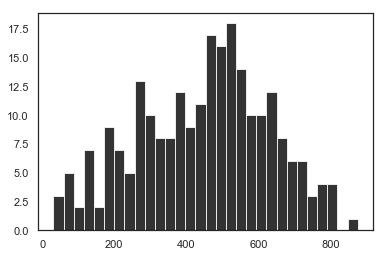

In [27]:
#Figure1, Con versus aSyn
sns.set_style("white")
black, gray = ((0, 0, 0), (0.6, 0.6, 0.6))
plt.hist(SVdistances, bins=30, color=black, alpha=0.8)

In [ ]:
#Figure5, Con versus Rescue
sns.set_style("white")
black, gray = ((0, 0, 0), (0.6, 0.6, 0.6))
plt.hist(SVdistances, bins=30, color=black, alpha=0.8)